## wavelet transform

### test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100 
t = np.arange(0, 1, 1 / fs)
f1 = 50
f2 = 5
signal = 0.6 * np.sin(2 * np.pi * f1 * t) + 2 * np.cos(2 * np.pi * f2 * t + np.pi/2)

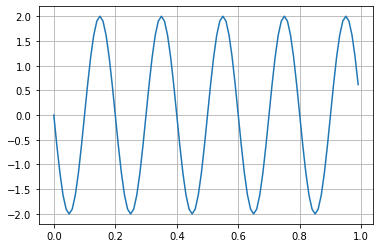

In [2]:
# visualizing signal
plt.plot(t, signal)
plt.grid()

In [3]:
import pywt

wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

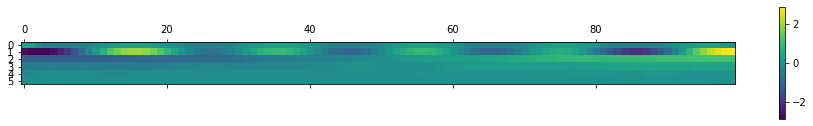

In [4]:
scales = np.asarray([1, 10, 50, 100, 200, 400])

coef, freqs=pywt.cwt(signal,scales,'mexh', sampling_period= 1)
plt.matshow(coef) # doctest: +SKIP
plt.colorbar()
plt.show()

# Arc signal wavelet transform

In [102]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환

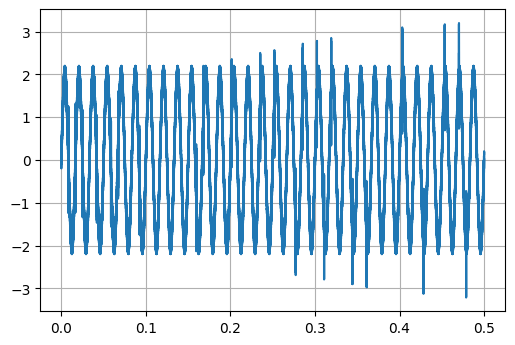

In [103]:
# visualizing signal (노말과 아크 상태를 추가하여 완성된 신호)

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

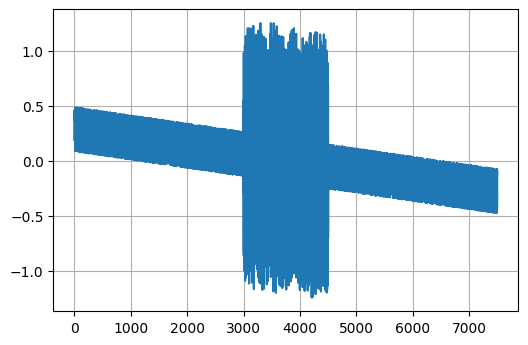

In [105]:
plt.figure(num = 1, dpi = 100)
plt.plot(sig[79500:87000])
plt.grid()

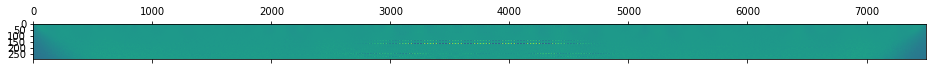

In [8]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

scales = np.arange(1, 300)
coef, freqs=pywt.cwt(sig[79500:87000], scales,'gaus1')
plt.matshow(coef) # doctest: +SKIP
plt.show()

# Verification

In [47]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
t = np.arange(0, 1, 1 / fs)
f1 = 30

np.random.seed(77)
no = np.random.uniform(100000, 500000, len(t))

signal = 2 * np.sin(2 * np.pi * f1 * t) + 0.2 * np.sin(2 * np.pi * no * t)

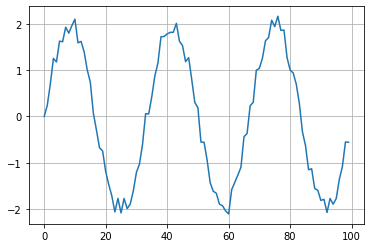

In [48]:
# visualizing signal
plt.plot(signal[:100])
plt.grid()

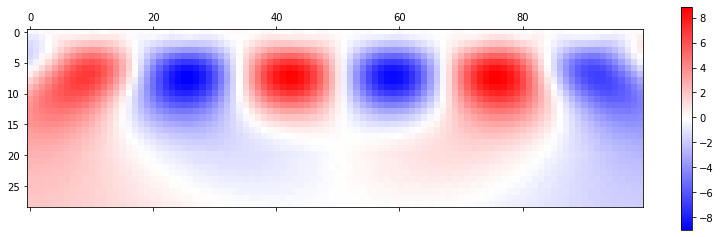

In [49]:
sig = signal[:100]

scales = np.arange(1, 30)

coef, freqs=pywt.cwt(sig, scales, 'mexh', sampling_period= 1)

cmap = plt.get_cmap('bwr')
plt.matshow(coef, cmap = cmap) # doctest: +SKIP
plt.colorbar()
plt.show()

In [50]:
def wavelet(sig, scale):
    max_scale = 0
    coef, freqs=pywt.cwt(sig, scales, 'mexh', sampling_period= 1)
    
    for i, n in enumerate(scales):
        if max_scale < coef[i].max():
            max_scale = coef[i].max()
            scale_size = n
            print("scale {}:".format(n), coef[i].max())
            
    coef, freqs=pywt.cwt(sig, scale_size, 'mexh', sampling_period= 1)
            
    cmap = plt.get_cmap('bwr')
    plt.matshow(coef, cmap=cmap)
    plt.colorbar(shrink=0.8, aspect=5)
    plt.show()

scale 1: 0.3405500590223095
scale 2: 1.0311021824030313
scale 3: 2.192538103167266
scale 4: 3.748915058554564
scale 5: 5.491320397781845
scale 6: 7.0773755059334835
scale 7: 8.255451707552256
scale 8: 8.863673233954286
scale 9: 8.892606265741854


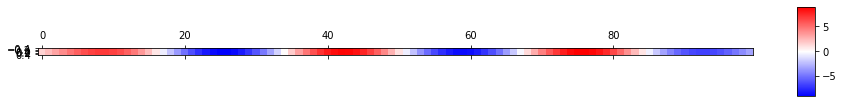

In [51]:
scales = np.arange(1, 30)

wavelet(sig, scales)

# Arc signal Verification

In [100]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환
sig = sig[79500:87000]

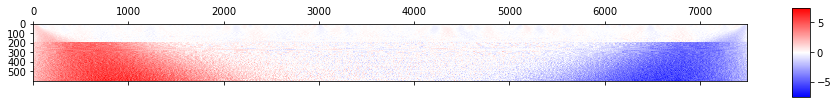

In [91]:
# scale_size = np.asarray([80, 159, 319, 640, 799, 959])
scale_size = np.array(np.arange(1, 201).tolist()+np.arange(600, 1000).tolist())
coef, freqs=pywt.cwt(sig, scale_size, 'mexh', method ='conv')
cmap = plt.get_cmap('bwr')
plt.matshow(coef, cmap=cmap)
plt.colorbar(shrink=0.8, aspect=5)
plt.show()

c:\users\user\anaconda3\envs\etri\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


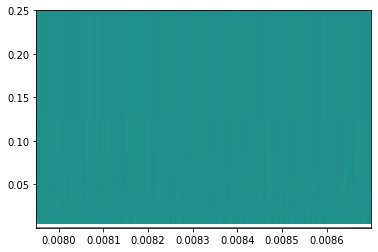

In [92]:
fs = 10000000
sampling_period = 1/fs
plt.pcolor(t[79500:87000], freqs, coef)

c:\users\user\anaconda3\envs\etri\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


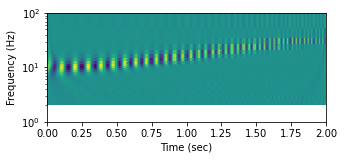

In [94]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import chirp

# Define signal
fs = 128
sampling_period = 1 / fs
t = np.linspace(0, 2, 2 * fs)
x = chirp(t, 10, 2, 40, 'quadratic')

# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(x, np.arange(1, 50), 'morl',
                       sampling_period=sampling_period)

# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
plt.pcolor(t, freqs, coef)

# Set yscale, ylim and labels
plt.yscale('log')
plt.ylim([1, 100])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.savefig('egg.png', dpi=150)


TypeError: Dimensions of C (49, 0) are incompatible with X (350001) and/or Y (49); see help(pcolor)

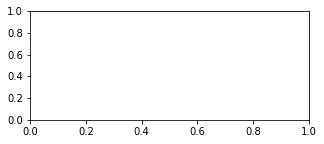

In [116]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import chirp

# Define signal
fs = 10000000
sampling_period = 1/fs
t = np.arange(0, 0.035, 1/fs)
sig = sig[79500:87000]

# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(sig, np.arange(1, 50), 'morl',sampling_period=sampling_period,
                      method = 'fft')

# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
plt.pcolor(t, freqs, coef)

# Set yscale, ylim and labels
plt.yscale('log')
plt.ylim([1, 100])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.savefig('egg.png', dpi=150)